In [25]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (6,5)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [26]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16



In [27]:
DATA='./CCA-relaxation-project/' 


In [28]:
#h = mr.MesaData(DATA+'history_r5_proper.data')
h = mr.MesaData(DATA+'LOGS/'+'history.data')


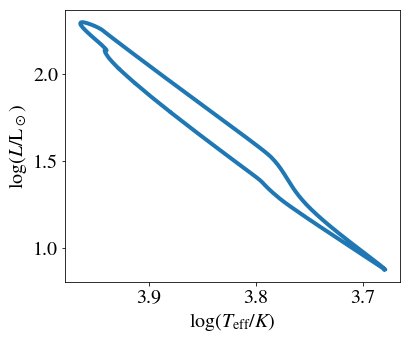

In [29]:
logl=h.log_L
logt=h.log_Teff

plt.plot(logt,logl,linewidth=4)

#plt.axis([3.87,3.65, 1, 2.1])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.gca().invert_xaxis()

12165


Text(0,0.5,'$\\log \\left( L / {\\rm L}_\\odot \\right)$')

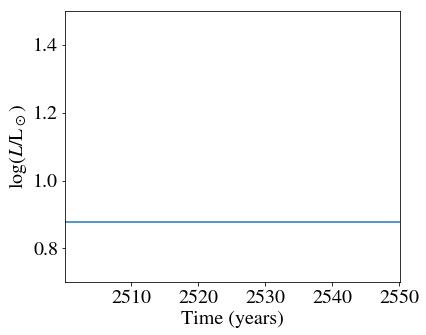

In [30]:
Rsun= 6.9598e10
#deltat = 

secyer=3600*24*365
#age=(h.star_age_sec)/secyer
age=(h.star_age)
#age=h.star_age_day
print(len(age))
t0=age[0]
plt.plot(age,logl)

#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([t0+2500,t0+2550, 0.7, 1.5])
plt.xlabel(r'Time (years)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')

Text(0,0.5,'$ R / {\\rm R}_\\odot$')

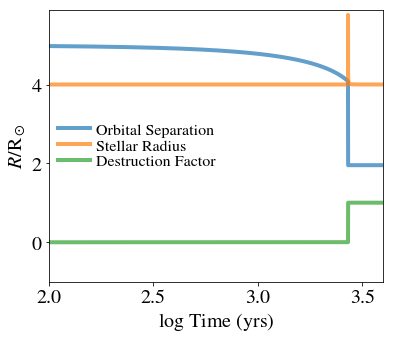

In [48]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(np.log10(age),dest_f,linewidth=4,alpha=0.7,label=' Destruction Factor')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
plt.axis([2,3.6, -1 , 5.9])
plt.xlabel(r'$\log$ Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

Text(0,0.5,'$ R / {\\rm R}_\\odot$')

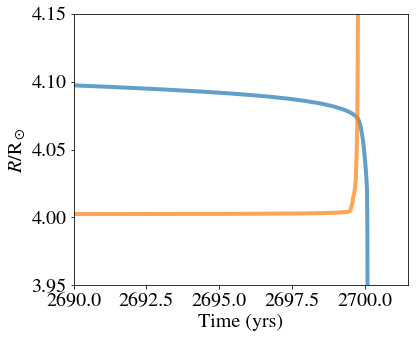

In [52]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location,linewidth=4,alpha=0.7)
plt.plot(age,star_radius,linewidth=4,alpha=0.7)
plt.plot(age,dest_f,linewidth=4,alpha=0.7)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([2690,2701.5, 3.95, 4.15])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

Text(0,0.5,'$ R / {\\rm R}_\\odot$')

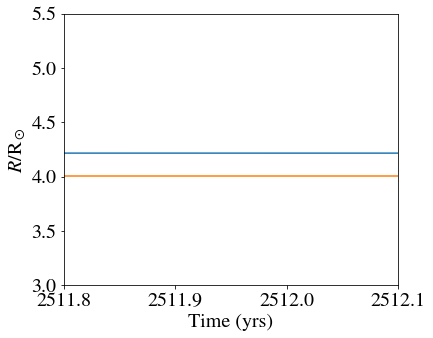

In [53]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location)
plt.plot(age,star_radius)
plt.plot(age,dest_f)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([2511.8,2512.1, 3, 5.5])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

4.126469283851165e+44


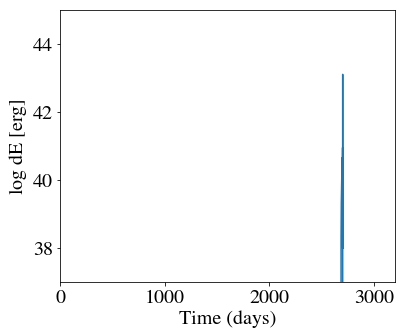

In [54]:
plt.plot(age,injected_e)
#plt.plot(age,star_radius)
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([t0,t0+3200, 37, 45])
plt.xlabel(r'Time (days)')
plt.ylabel(r'$\log  $ dE [erg]')
dt=10**logdt
print(sum(10**injected_e))

In [56]:
# Number of orbits per timesep 
age=(h.star_age)#*365.0
r=h.Orbital_separation*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Find Grazing Phase
#print(np.where(f<0))
#print(np.where(area<1.0))

# Find Engulfment Phase
#print(np.where(area==1.0))

# End of Engulfment 

# Find dynamical engulfment phase
# End of phase (destruction)
i=0
while (f[i] <= 0.0):
    i=i+1
# Beginning of phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)):
    j=j+1
    
print(i,j)




12008 2201


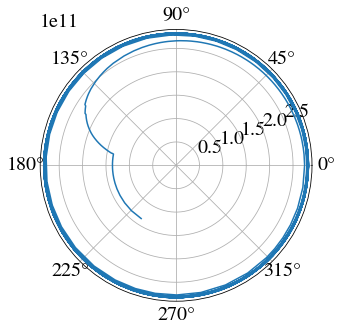

In [69]:
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
ax.plot(alpha[j+12:i-130] , r[j+12:i-130])
ax.set_rscale('linear')

In [57]:
h = mr.MesaData('./1.0_energy_injection_11701/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)




[2776.951434919681, 2776.942666678851]


1.0_energy_injection_11701/LOGS ['1.0_energy_injection_11701/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


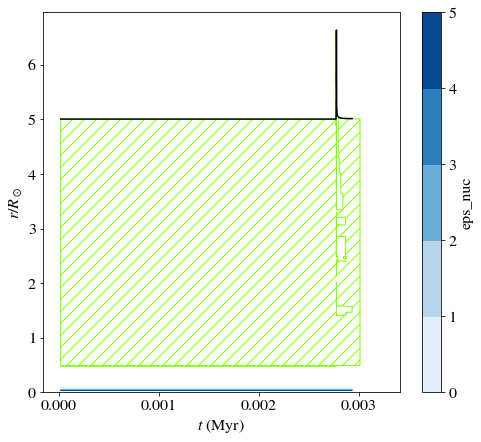

In [58]:
import mkipp
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_11701/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'))
FILENAME = "kipp_eng_m.pdf"
plt.savefig(FILENAME)    


[2776.951434919681, 2776.942666678851]
1.0_energy_injection_11701/LOGS ['1.0_energy_injection_11701/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x1273a7518>, histories=[<mesa_data.mesa_data object at 0x1273a7860>], xlims=(1.0, 2100.0))

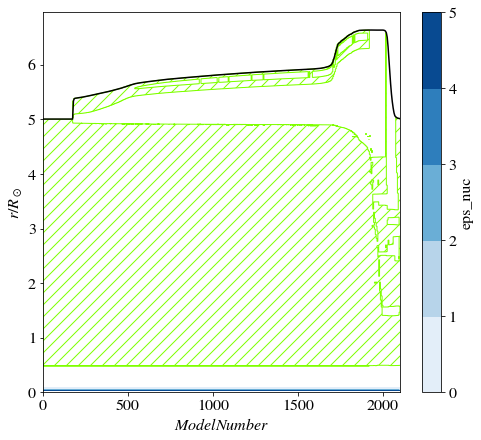

In [59]:
import mkipp
h = mr.MesaData('1.0_energy_injection_11701/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_11701/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "model_number",yaxis='radius'),xlims = [0,2100])


[2776.951434919681, 2776.942666678851]
1.0_energy_injection_11701/LOGS ['1.0_energy_injection_11701/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x12864e4e0>, histories=[<mesa_data.mesa_data object at 0x12755cbe0>], xlims=(0.0023765651674139657, 0.0029337363354001497))

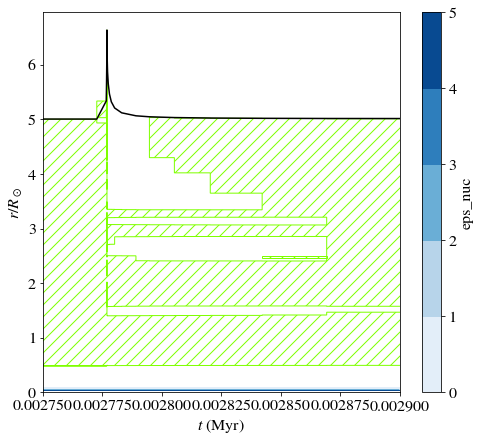

In [65]:
import mkipp
h = mr.MesaData('1.0_energy_injection_11701/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_11701/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'),xlims = [0.00275,0.0029])
